References:

1) https://www.neuron.yale.edu/neuron/static/new_doc/programming/hocsyntax.html

2) https://www.neuron.yale.edu/neuron/static/new_doc/programming/python.html

3) https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html

4) https://www.geeksforgeeks.org/single-neuron-neural-network-python/

5) https://github.com/piazentin/ksets

6) AP - https://www.moleculardevices.com/applications/
patch-clamp-electrophysiology/what-action-potential#gref

7) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/network/netcon.html

8) http://neupy.com/apidocs/neupy.algorithms.associative.hebb.html

9) https://qbi-software.github.io/NEURON-tutorial/lessons/network

10) https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html

11) http://www.cnel.ufl.edu/courses/EEL6814/chapter6.pdf

12) https://www.slideshare.net/mentelibre/hebbian-learning

13) http://www.diva-portal.org/smash/get/diva2:1089220/FULLTEXT02

In [ ]:
pip install neuron

     |████████████████████████████████| 12.6 MB 22.4 MB/s 


## Move nvninmodl files to curr_dir (for ORN)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !ls /content/drive/My\ Drive/nrnmodl/
# !cp /content/drive/My\ Drive/nrnmodl/* /content

In [ ]:
# !pwd

In [ ]:
# !nrnivmodl

**Stage 1:Importing required libraries**

In [ ]:
from neuron import h                     #.h is a HOC object instanced & gui from neuron can also be imported 
from neuron.units import ms,mV
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation
  
import matplotlib.pyplot as plt1

import numpy as np
from scipy.stats import poisson
import seaborn as sb

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

# import logging
# logging.basicConfig(level=logging.DEBUG)

# size=int(input('Enter no.of sets  '))
size = 30

In [ ]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

### **Stage 2:Making a Neuron with specific properties**

In [ ]:
# #This is the ORN class
# class ORN:
#     def __init__(self,gid,M):
#         self._gid = gid
#         self.M = M+1

#         # Set morphology
#         self.soma = h.Section(name='soma', cell=self)
#         self.axon = h.Section(name='axon', cell=self)
#         self.dendArr = [h.Section(name="dend%d" % i, cell=self) for i in range(1)]
#         self.dendriticknobArr = [h.Section(name="dendriticknob%d" % i, cell=self) for i in range(1)]
#         self.ciliumArr = [h.Section(name="cilium%d" % i, cell=self) for i in range(1)]

#         self.axon.connect(self.soma(0),0)
#         self.dendArr[0].connect(self.soma(1),0)
#         self.dendriticknobArr[0].connect(self.dendArr[0](0),1)
        
#         self.dendriticknobArr[0].nseg = 1
#         self.dendriticknobArr[0].diam = 2
#         self.dendriticknobArr[0].L = 2
#         self.dendriticknobArr[0].insert('ciliaProp')

#         for i in range(1):
#             self.ciliumArr[i].connect(self.dendriticknobArr[0](1),0)

# #         self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
# #         self.spike_times = h.Vector()
# #         self._spike_detector.record(self.spike_times)
# #         self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
# #         self._ncs = [] 

#         # anatomical and biophysical properties
#         self.soma.nseg = 1 
#         self.soma.L = 9 # micrometer
#         self.soma.diam = 6
#         self.soma.insert('hh1')

#         self.axon.nseg = 1
#         self.axon.L = 100
#         self.axon.diam = 1
#         self.axon.insert('hh')
    
#         self.dendArr[0].nseg = 1
#         self.dendArr[0].L = 50
#         self.dendArr[0].diam = 1.5
#         self.dendArr[0].insert('dendProp')
#         # self.dendArr[0].e_pas = -65
#         # self.dendArr[0].g_pas = 0.001

#         for i in range(1):
#             self.ciliumArr[i].nseg = 1
#             self.ciliumArr[i].diam = 0.28
#             self.ciliumArr[i].L = 200
#             self.ciliumArr[i].insert("blr300%d" % i)

#         self.tstop = 6
        
#     def __repr__(self):
#         return 'Set [{}]_ORNcell [{}]'.format(self.M,self._gid)
#         #This shows how to represent each part when called upon

In [ ]:
#This class makes one cell neuron(soma,axon,dendrite)
class MCELL:
    def __init__(self, gid, M):
        self._gid = gid #Neuron no.
        self.M = M+1
        #Setting morphology
        #Creating soma,dend and axon
        self.soma=h.Section(name='soma',cell=self)
        self.dend=h.Section(name='dend',cell=self)
        self.axon=h.Section(name='axon',cell=self)
        
        self.all = [self.axon, self.soma, self.dend] 
        #list of all the sections in the cell.
        #We could explicitly specify the connection location  by self.dend.connect(self.soma(0.5))
        
        self.dend.connect(self.soma,1,0)
        self.axon.connect(self.soma,0,0)
        
        self._spike_detector = h.NetCon(self.axon(0.5)._ref_v, None, sec=self.axon)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        self.axon_v = h.Vector().record(self.axon(0.5)._ref_v)
        self._ncs = [] 
        
        #Defining geometry of soma
        self.soma.L = 18.8 
        self.soma.diam = 18.8 #in microns
        self.soma.nseg = 1                  #No. of segments
        
        #Defining geometry of dend
        self.dend.nseg = 1                  #No. of segments
        self.dend.L = 701.9                 #in microns
        self.dend.diam = 3.18                #in microns
        self.dendexcisyn = h.ExpSyn(self.dend(0.5))
        self.dendexcisyn.tau = 1 *ms   # tau is decay time constant
        self.dendexcisyn.e = 0    # reversal potential
        
        #Defining geometry for axon
        self.axon.nseg = 1
        self.axon.L = 152
        self.axon.diam = 3.18
        
        #Setting biophysics
        for sec in self.all:                                                  
            sec.Ra = 123    # Axial resistance in Ohm * cm                    
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        self.soma.insert('hh')            #Inserting HH neurons
        self.axon.insert('hh')
        self.dend.insert('pas')
        for seg in self.dend:                               
            seg.pas.g = 0.001  # Passive conductance in S/cm2 
            seg.pas.e = -78    # Leak reversal potential mV
        
    def __repr__(self):
        return 'Set [{}]_Mcell [{}]'.format(self.M,self._gid)
        #This shows how to represent each part when called upon

### **Uniform Distribution**

In [ ]:
# from scipy.stats import uniform
# label=['Pdf','Histogram']
low, high = 0.05, 0.09
uniform_distribution = np.random.uniform(low, high,2*size-1)
print(uniform_distribution)
# Create the bins and histogram
# count, bins, ignored = plt1.hist(uniform_distribution,10)
# #plt1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt1.plot(bins,uniform.pdf(bins))
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.grid()
# plt1.show()
# print(uniform_distribution)

[0.06340651 0.08878416 0.05700365 0.07922482 0.0758995  0.05713714
 0.05842416 0.06507547 0.07301679 0.05068123 0.07416898 0.05757864
 0.0836678  0.08825853 0.05451912 0.07663775 0.08103608 0.08445406
 0.0862605  0.07019605 0.07260972 0.06066816 0.08668958 0.05066826
 0.07669449 0.07724585 0.0763529  0.07757288 0.0614143  0.0845088
 0.07804424 0.07757915 0.05716769 0.05114297 0.05050038 0.0706634
 0.05625787 0.07524564 0.0826198  0.06351437 0.07827738 0.05730116
 0.07824257 0.07609391 0.08885283 0.05634929 0.05808307 0.05019315
 0.06433852 0.05961071 0.07889199 0.08382527 0.0550203  0.08564663
 0.05706793 0.07757027 0.06014952 0.08983468 0.06890103]


In [ ]:
weights = uniform_distribution
print(weights)
print(np.mean(weights))

[0.06340651 0.08878416 0.05700365 0.07922482 0.0758995  0.05713714
 0.05842416 0.06507547 0.07301679 0.05068123 0.07416898 0.05757864
 0.0836678  0.08825853 0.05451912 0.07663775 0.08103608 0.08445406
 0.0862605  0.07019605 0.07260972 0.06066816 0.08668958 0.05066826
 0.07669449 0.07724585 0.0763529  0.07757288 0.0614143  0.0845088
 0.07804424 0.07757915 0.05716769 0.05114297 0.05050038 0.0706634
 0.05625787 0.07524564 0.0826198  0.06351437 0.07827738 0.05730116
 0.07824257 0.07609391 0.08885283 0.05634929 0.05808307 0.05019315
 0.06433852 0.05961071 0.07889199 0.08382527 0.0550203  0.08564663
 0.05706793 0.07757027 0.06014952 0.08983468 0.06890103]
0.07011595855377892


## **Stage 3.5 : Make different sorts of inputs**

In [ ]:
def stairstep(lo: float, hi: float, duration: int, max_duration: int = 200, noise: list = []) -> list:
    # duration and max_duration are in ms
    ans = [lo if i < duration else hi for i in range(0,max_duration)]
    if len(noise) == 0:
        return ans
    else:
        assert len(ans) == len(noise)
        return [ans[i]+noise[i] for i in range(len(ans))]
    # return [0+0.8*(i/duration) if i < duration else 0 for i in range(0,max_duration)]
    # visualize input 

Text(0, 0.5, 'Current (nA)')

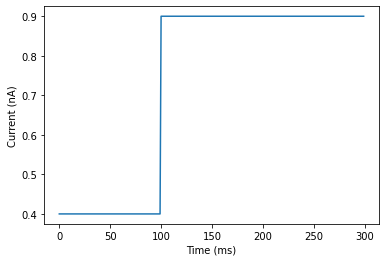

In [ ]:

# f = plt.figure()
plt1.plot(stairstep(0.4, 0.9, 100, 300))
plt1.xlabel('Time (ms)')
plt1.ylabel('Current (nA)')


**Stage 4: Coupling a neuron according to Freeman's KI Set with the weights given above**

In [ ]:
#Gives one 2 coupled neuron using freeman's topology in olfactory bulb
class CONNECTING:

    def __init__(self,M,weights,delay1=1,delay2=1):
        wMM=weights[0]
        
        self.M = M #Set no.
        self.th = -70
        self.maindelay = 0
        
        #Making 2 neurons
        self.cells=[]
        self.P1=MCELL(1,self.M)
        self.P2=MCELL(2,self.M)
        self.cells.append(self.P1)
        self.cells.append(self.P2)
        
        #Giving current pulse
        self.stim = h.IClamp(self.P1.dend(0.5))
        # noise with increase in standard deviation
        self.noise = np.random.normal(0, 0.003, 100)
        self.input = h.Vector(stairstep(0,0.1,10,100,self.noise))
        self.tv = h.Vector([i for i in range(100)])
        self.stim.delay = 10
        self.stim.dur = 100
        self.stim.amp = 0
        self.input.play(self.stim._ref_amp, self.tv, True) 
        
        
        #Connecting P1 to P2
        self.nc1 = h.NetCon(self.P1.axon(0.5)._ref_v,self.P2.dendexcisyn,sec=self.P1.axon)   # P1.axon to P2.dend
        self.nc1.weight[0] = weights[M]
        
        
        self.nc1.delay = 0.1 #tP1P2
        self.nc1.threshold = self.th
        
        #Connecting P2 to P1
        self.nc2 = h.NetCon(self.P2.axon(0.5)._ref_v,self.P1.dendexcisyn,sec=self.P2.axon)    #P2.axon to P1.dend
        self.nc2.weight[0] = weights[M]
        self.nc2.delay = 0.3 #tP2P1
        self.nc2.threshold = self.th    

            

**Stage 5: Laterally connect each set of 2 coupled neurons according to Freeman's KI Set**

In [ ]:
class LATERAL:

    def __init__(self,N,weights):
        wMML=weights
        #wMML=0.1
        
        self.N = N
        self.th = -70
        self.maindelay = 20
        self.sets = []
        c=0
        for i in range(N):
            self.sets.append(CONNECTING(i,weights))
        
        self.netConArr = []
        for r in range(0,N-1):
          #Connecting P1[0] to P1[1]
          # make a list for easier access
          netConList = []
          netConList.append(h.NetCon(self.sets[r].P1.axon(0.5)._ref_v, self.sets[r+1].P1.dendexcisyn,sec=self.sets[r].P1.axon))
          netConList[0].weight[0]  = wMML[r+N]
          print("Lateral weight is", wMML[r+N])
          netConList[0].delay = self.maindelay+1
          netConList[0].threshold = self.th

          netConList.append(h.NetCon(self.sets[r+1].P1.axon(0.5)._ref_v, self.sets[r].P1.dendexcisyn, sec=self.sets[r+1].P1.axon))
          netConList[1].weight[0] = wMML[r+N]
          netConList[1].delay = self.maindelay+2
          netConList[1].threshold = self.th

          self.netConArr.append(netConList)

          # exec(f"self.nc11_{r} = h.NetCon(getattr(self.sets[r].P1.axon(0.5), '_ref_v'), self.sets[1+r].P1.dendexcisyn,sec=self.sets[r].P1.axon)")
          # exec(f"self.nc11_{r}.weight[0] = wMML[r+N]")
          # print("lateral weight is", wMML[r+N])
          # exec(f"self.nc11_{r}.delay = self.maindelay+1")
          # exec(f"self.nc11_{r}.threshold = self.th")
          # exec(f"self.nc12_{r} = h.NetCon(getattr(self.sets[1+r].P1.axon(0.5), '_ref_v'), self.sets[r].P1.dendexcisyn,sec=self.sets[1+r].P1.axon)")
          # exec(f"self.nc12_{r}.weight[0] = wMML[r+N]")
          # #print(wMML[r+N])
          # exec(f"self.nc12_{r}.delay = self.maindelay+2")
          # exec(f"self.nc12_{r}.threshold = self.th")

**Stage 6: Input the number of 2 coupled sets required (which are all laterally connected)**

In [ ]:
#Give N value to get N no. of 2 coupled neurons laterally connected
given_input_from_user =size #  int(input('Enter the number of 2 coupled sets required: '))
L1=LATERAL(given_input_from_user,weights)
print(weights)

Lateral weight is 0.07804423761437794
Lateral weight is 0.0775791505950692
Lateral weight is 0.057167686203668175
Lateral weight is 0.05114296768510555
Lateral weight is 0.05050037720609638
Lateral weight is 0.07066339538563657
Lateral weight is 0.05625786661769053
Lateral weight is 0.07524563923282739
Lateral weight is 0.0826197973759083
Lateral weight is 0.06351437438550905
Lateral weight is 0.07827737959353709
Lateral weight is 0.05730115824734905
Lateral weight is 0.07824256759082998
Lateral weight is 0.07609391447239232
Lateral weight is 0.08885282934835236
Lateral weight is 0.05634928667067125
Lateral weight is 0.05808306986268416
Lateral weight is 0.05019314606932837
Lateral weight is 0.06433851862307466
Lateral weight is 0.0596107138929578
Lateral weight is 0.07889198704733465
Lateral weight is 0.08382527330704598
Lateral weight is 0.055020301465937754
Lateral weight is 0.08564663373038281
Lateral weight is 0.057067928581220805
Lateral weight is 0.0775702736167618
Lateral weigh

**Stage 7: Visualize the topology of the neurons and the 3D space they are in. Also visualize the density mechanisms added to each neuron of a set**

In [ ]:
h.topology()


|-|       Set [1]_Mcell [1].soma(0-1)
   `|       Set [1]_Mcell [1].dend(0-1)
 `|       Set [1]_Mcell [1].axon(0-1)
|-|       Set [1]_Mcell [2].soma(0-1)
   `|       Set [1]_Mcell [2].dend(0-1)
 `|       Set [1]_Mcell [2].axon(0-1)
|-|       Set [2]_Mcell [1].soma(0-1)
   `|       Set [2]_Mcell [1].dend(0-1)
 `|       Set [2]_Mcell [1].axon(0-1)
|-|       Set [2]_Mcell [2].soma(0-1)
   `|       Set [2]_Mcell [2].dend(0-1)
 `|       Set [2]_Mcell [2].axon(0-1)
|-|       Set [3]_Mcell [1].soma(0-1)
   `|       Set [3]_Mcell [1].dend(0-1)
 `|       Set [3]_Mcell [1].axon(0-1)
|-|       Set [3]_Mcell [2].soma(0-1)
   `|       Set [3]_Mcell [2].dend(0-1)
 `|       Set [3]_Mcell [2].axon(0-1)
|-|       Set [4]_Mcell [1].soma(0-1)
   `|       Set [4]_Mcell [1].dend(0-1)
 `|       Set [4]_Mcell [1].axon(0-1)
|-|       Set [4]_Mcell [2].soma(0-1)
   `|       Set [4]_Mcell [2].dend(0-1)
 `|       Set [4]_Mcell [2].axon(0-1)
|-|       Set [5]_Mcell [1].soma(0-1)
   `|       Set [5]_Mcell [1].den

1.0

In [ ]:
# for sec in h.allsec():
#     print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

In [ ]:
# label=['spatial representation']
# h.PlotShape(True).plot(plt1)
# plt1.xlabel('length')
# plt1.ylabel('breadth')
# #plt1.zlabel('t (ms)')
# plt1.legend(label)

In [ ]:
from neuron import h, gui2
gui2.set_backend('jupyter')
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

In [ ]:
recording_cell = L1.sets[0].stim
graph = h.Vector().record(recording_cell._ref_i)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300*ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(graph), line_width=2,legend_label='Input',line_color='black')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

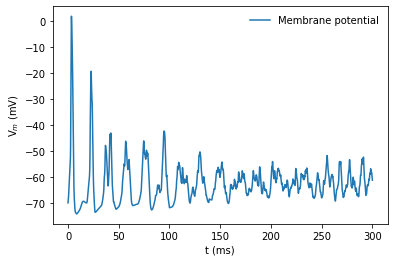

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

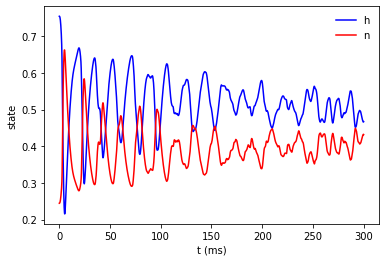

<IPython.core.display.Javascript object>

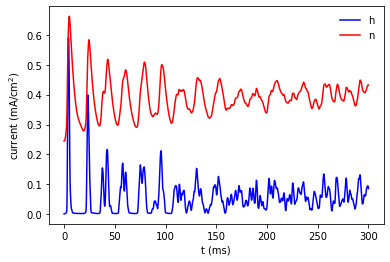

In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)


fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


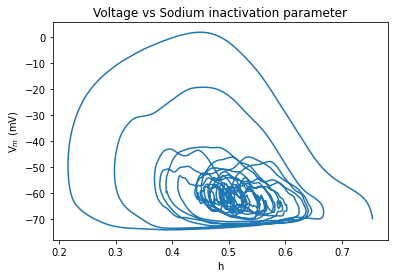

In [ ]:
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


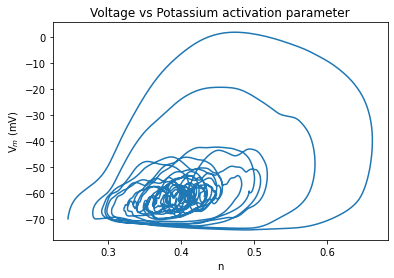

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

**Stage 8: Record & visualize the voltage values at each axon and dendride**

In [ ]:
recording_cell = L1.sets[4].P1
print("The voltage at P1's axon:", recording_cell.axon(0.5).v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
print("The voltage at P1's dendrite:", recording_cell.dend(0.5).v)
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

The voltage at P1's axon: -75.11716311155698
The voltage at P1's dendrite: -76.94599984622627


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
recording_cell = L1.sets[4].P2
axon_P2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_P2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P2), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P2), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

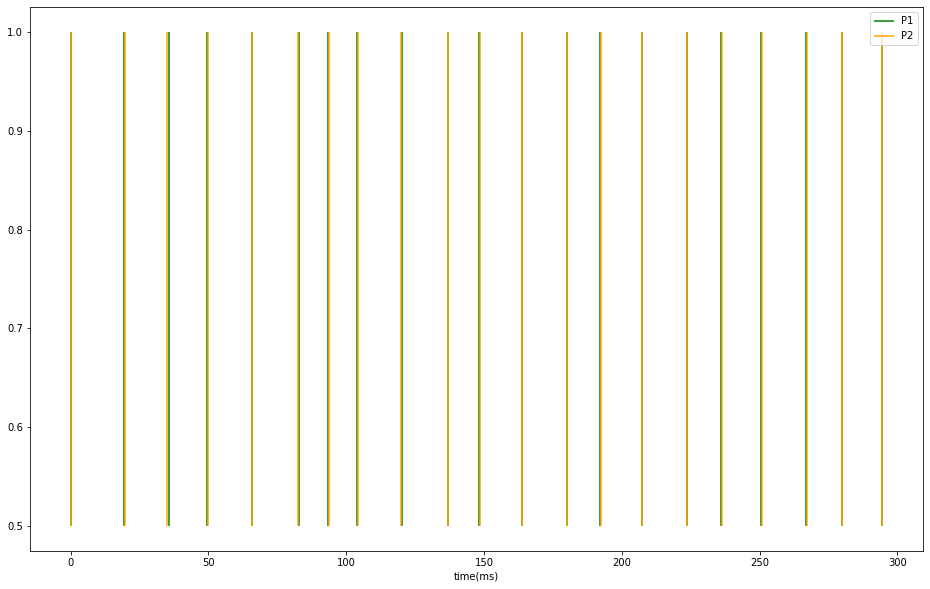

In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(1):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.vlines(L1.sets[j].cells[0].spike_times+(100*j), 0.5, 1,color=color[0]) # for P1
    plt1.vlines(L1.sets[j].cells[1].spike_times+(100*j), 0.5, 1, color=color[1])
plt1.xlabel('time(ms)')
plt1.legend(label)


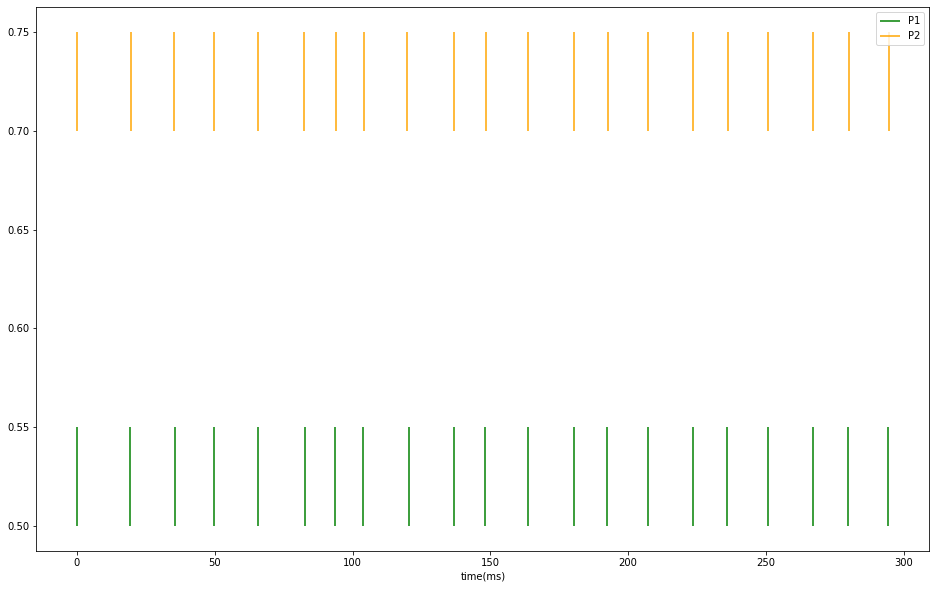

In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(1):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.vlines(L1.sets[j].cells[0].spike_times+(100*j), 0.5, 0.55,color=color[0]) # for P1
    plt1.vlines(L1.sets[j].cells[1].spike_times+(100*j), 0.7, 0.75, color=color[1])
plt1.xlabel('time(ms)')
plt1.legend(label)


In [ ]:
L1.sets[0].cells[0].spike_times+(100*1)

Vector[493]

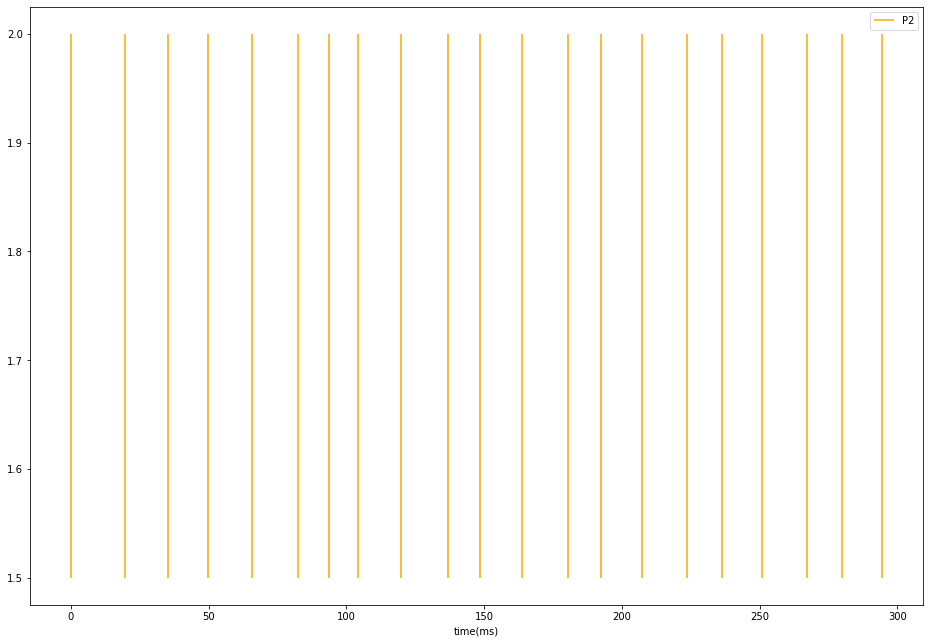

In [ ]:
color=['green','orange']
label=['P2']
plt1.figure(figsize=(16,11))
for j in range(1):
  #for i,cell in enumerate(L1.sets[j].cells):
    plt1.vlines(L1.sets[j].cells[1].spike_times+(100*j), 1.5, 2,color=color[1]) # for P2
plt1.xlabel('time(ms)')
plt1.legend(label)

## Weights before learning

In [ ]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 before learning': P1_spike_times, 'P2 before learning' : P2_spike_times}
pandas.DataFrame(data)

P1 before learning  P2 before learning
0                0.025               0.025
1               19.300              19.625
2               35.750              35.125
3               49.575              49.800
4               65.725              65.850
5               82.825              82.375
6               93.525              93.825
7              103.975             104.250
8              120.425             119.925
9              136.775             136.925
10             148.225             148.500
11             163.700             163.850
12             180.300             180.300
13             192.250             192.525
14             207.200             207.375
15             223.700             223.725
16             236.050             236.325
17             250.700             250.900
18             266.975             267.100
19             279.775             280.025
20             294.350             294.550

### **Before learning Firing rate**

In [ ]:
fr_P1=[0 for i in range(len(L1.sets))]
fr_P2=[0 for i in range(len(L1.sets))]
for f in range(len(L1.sets)):
  t=list(L1.sets[f].cells[0].spike_times)
  #print("spikes of p1", t)
  t1=list(L1.sets[f].cells[1].spike_times)
  #print("spikes of p2", t1)
  fr_P1[f]=(len(t)/100)*1000
  fr_P2[f]=(len(t1)/100)*1000
#print("frequencies of P1 in each set", fr_P1)
#print("frequencies of P2 in each set", fr_P2)

c=[0 for i in range(size*2)]
for i in range(size):
  c[i*2]=fr_P1[i]
  c[i*2+1]=fr_P2[i]
print("Frequencies of each neuron before learning", c)

Frequencies of each neuron before learning [210.0, 210.0, 210.0, 210.0, 200.0, 200.0, 190.0, 190.0, 220.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 200.0, 200.0, 190.0, 190.0, 220.0, 220.0, 240.0, 230.0, 220.0, 200.0, 240.0, 240.0, 240.0, 240.0, 220.0, 220.0, 240.0, 220.0, 210.0, 210.0, 200.0, 200.0, 190.0, 190.0, 210.0, 200.0, 230.0, 220.0, 240.0, 210.0, 220.0, 200.0, 200.0, 200.0, 190.0, 190.0, 200.0, 190.0, 200.0, 190.0, 210.0, 210.0, 180.0, 180.0]


## Population Activity (Before Learning)

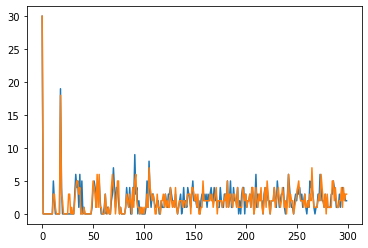

In [ ]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

In [ ]:
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.0011
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

### **Stage 9:Learning**

In [ ]:
# epochs = 50
# import numpy as np
# import math
# out_1_1_data = []
# A_plus = 0.01      #0.2 to 2.5
# A_minus = -0.01
# tau_pre = 20*ms
# tau_post = 20*ms

# weights_rec = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
# weights_rec_2 = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
# L_weights_rec= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]
# L_weights_rec_2= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]

# for l in range(epochs):  
#     print("\niteration no is",l)
#     P1_data = []
#     print("\nmutual learning")
#     for i in range(len(L1.sets)):
#         h.continuerun(300 *ms)
#         out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
#         # print("Spike times P{0}".format(1+i*2), list(L1.sets[i].P1.spike_times))
#         spike_1_1 = list(L1.sets[i].P1.spike_times)
#         out_1_2 = h.Vector().record(L1.sets[i].P2.dend(0.5)._ref_v)
#         spike_1_2 = list(L1.sets[i].P2.spike_times)
#         # print("Spike times P{0}".format(2+i*2), list(L1.sets[i].P2.spike_times))
#         t = h.Vector().record(h._ref_t)
#         h.finitialize(-70 * mV)
        
#         for k in range(1,3):
#             delta_t = [(spike_1_2[iter] - spike_1_1[iter]) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
#             delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0.24 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(spike_1_1),len(spike_1_2)))]
#             delta_w = sum(delta_w_list)
#             exec(f"L1.sets[i].nc{k}.weight[0] += delta_w")         
#         P1_data.append(list(out_1_1))
#         print("weight:", L1.sets[i].nc1.weight[0])
#         weights_rec[i][l] = L1.sets[i].nc1.weight[0]
#         weights_rec_2[i][l] = L1.sets[i].nc2.weight[0]    



# #Lateral Learning
#     print("\tlateral learning")
#     for i in range(len(L1.sets)-1):
#       h.continuerun(300 *ms)
#       out_1_1 = h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)
#       print("Spike times P{0}".format(1+2*i), list(L1.sets[i].P1.spike_times))
#       spike_1_1 = list(L1.sets[i].P1.spike_times)
#       out_2_1 = h.Vector().record(L1.sets[i+1].P1.axon(0.5)._ref_v)
#       print("Spike times P{0}".format(3+2*i), list(L1.sets[i+1].P1.spike_times))
#       spike_2_1 = list(L1.sets[i+1].P1.spike_times)
#       h.finitialize(-70 * mV)

#       # change the deltas
      
#       L1.netConArr[i][0].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)
#       L1.netConArr[i][1].weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)

#       # Logging work

#       print(L1.netConArr[i][0].weight[0])
#       L_weights_rec[i][l] = L1.netConArr[i][0].weight[0]
#       L_weights_rec[i][l] = L1.netConArr[i][1].weight[0]
#       # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
#       # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_2_1)")
#       # exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i], spike_M1_data[i+1])")
#       # exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_M1_data[i+1], spike_M1_data[i])")
#       # print("lateral weight is : ",L1.nc11_0.weight[0])  
#       # L_weights_rec[i][l] = L1.nc11_0.weight[0]
#       # L_weights_rec_2[i][l]=L1.nc12_i.weight[0] 
#       # exec(f"print(L1.nc11_{i}.weight[0])")
#       # exec(f"L_weights_rec[i][l]=L1.nc11_{i}.weight[0]")
#       # exec(f"L_weights_rec_2[i][l]=L1.nc12_{i}.weight[0]")

In [ ]:
import sys, time
tick = time.time()
epochs = 100
weight_data = []

out = display(progress(0, epochs), display_id=True)

for l in range(epochs):
    #print("iteration no is",l)
    out.update(progress(l, epochs))    
    # print("\nmutual learning")
    P1_axon_data = []
    P1_dend_data = []
    P2_axon_data = []
    P2_dend_data = []
    M1_axon_data = []
    M1_dend_data = []
    M2_axon_data = []
    M2_dend_data = []
    G1_axon_data = []
    G1_dend_data = []
    G2_axon_data = []
    G2_dend_data = []
    P1_spike_times = []
    P2_spike_times = []
    M1_spike_times = []
    M2_spike_times = []
    G1_spike_times = []
    G2_spike_times = []

    h.finitialize(-70* mV)
    h.continuerun(300*ms)
    t = h.Vector().record(h._ref_t)
    
    for i in range(len(L1.sets)):
        P1_axon_data.append(list(h.Vector().record(L1.sets[i].P1.axon(0.5)._ref_v)))
        P1_dend_data.append(list(h.Vector().record(L1.sets[i].P1.dend(0.5)._ref_v)))
        P1_spike_times.append(list(L1.sets[i].P1.spike_times))
        P2_axon_data.append(list(h.Vector().record(L1.sets[i].P2.axon(0.5)._ref_v)))
        P2_spike_times.append(list(L1.sets[i].P2.spike_times))
        P2_dend_data.append(list(h.Vector().record(L1.sets[i].P2.dend(0.5)._ref_v)))
   
    # h.finitialize(-70 * mV)

    for i in range(len(L1.sets)):
        # 2-coupled STDP-based learning
        L1.sets[i].nc1.weight[0] += generate_L_weight_delta(P1_spike_times[i], P2_spike_times[i])
        # logging
        # print("P1_axon", P1_spike_times[i], P2_spike_times[i])
        L1.sets[i].nc2.weight[0] += generate_L_weight_delta(P2_spike_times[i], P1_spike_times[i])
        
    # do a proper logging function
    weight_data.append(L1.sets[0].nc1.weight[0])


    #Lateral Learning
    for i in range(len(L1.sets)-1):
        # 2-coupled part
        L1.netConArr[i][0].weight[0] += generate_L_weight_delta(P1_spike_times[i], P1_spike_times[i+1])
        L1.netConArr[i][1].weight[0] += generate_L_weight_delta(P1_spike_times[i+1], P1_spike_times[i])
    

out.update(progress(epochs, epochs))    
tock = time.time()
print("The time it took to learn", tock-tick, "seconds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The time it took to learn 65.09939765930176 seconds


<IPython.core.display.Javascript object>

In [ ]:
# print(sum([len(list(cell.cells[0].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))
# print(sum([len(list(cell.cells[1].spike_times)) for cell in L1.sets])/(len(L1.sets)*300))


<IPython.core.display.Javascript object>

In [ ]:
## TODO: Check what kind of distribution is followed by the output

## Weights after learning

In [ ]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 after learning': P1_spike_times, 'P2 after learning' : P2_spike_times}
pandas.DataFrame(data)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


P1 after learning  P2 after learning
0               0.025              0.025
1              24.025             24.025
2              40.675             40.825
3              63.375             63.500
4              80.325             80.475
5             102.475            102.600
6             124.175            124.300
7             145.400            145.525
8             167.225            167.350
9             188.450            188.575
10            210.275            210.400
11            231.500            231.625
12            253.325            253.450
13            274.550            274.675
14            282.850            283.075
15            296.525            296.725

**Stage 8: Record & visualize the voltage values at each axon and dendride after learning**

In [ ]:
recording_cell = L1.sets[2].P1
dend_P1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
axon_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
print(recording_cell.axon(0.5).v)
h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P1 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P1 dend',line_color='red', line_dash='dashed')
plt2.show(f)

-71.81815420113429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
recording_cell = L1.sets[2].P2
axon_P1 = h.Vector().record(recording_cell.soma(0.5)._ref_v)
dend_P1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(100 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_P1), line_width=1,legend_label='P2 axon',line_color='black')
f.line(t, list(dend_P1), line_width=2,legend_label='P2 dend',line_color='red', line_dash='dashed')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# print(weight_data)
f = plt2.figure(x_axis_label='epochs')
x = [i for i in range(epochs)]
f.line(x, weight_data, line_width=1, line_color='black')
plt2.show(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

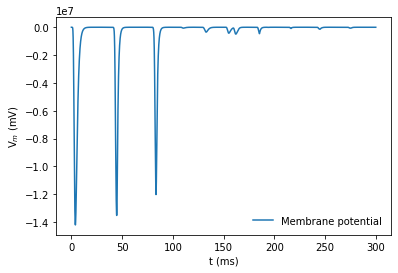

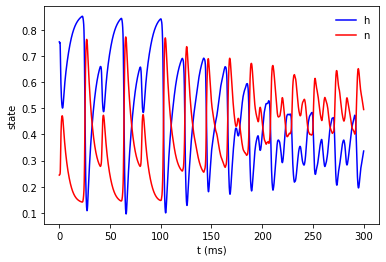

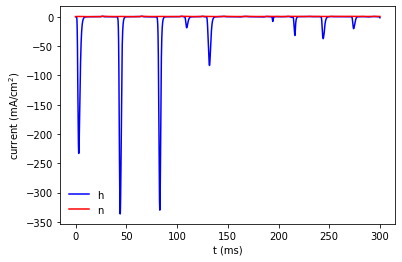

In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)


fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


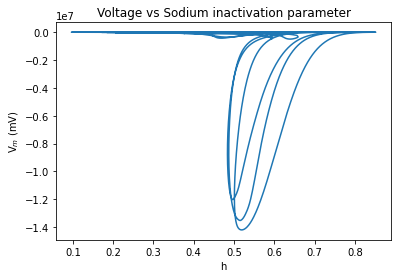

In [ ]:
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
pyplot.legend(frameon=False)

No handles with labels found to put in legend.


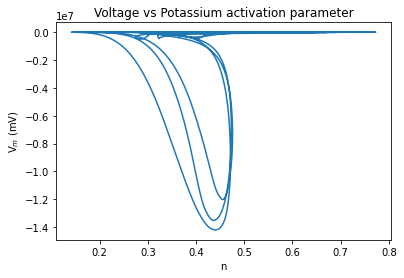

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

## Population Activity

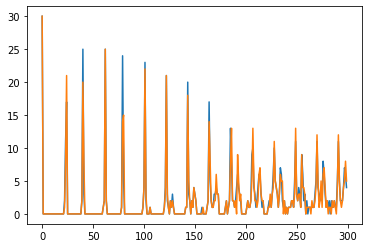

In [ ]:
resolution = 1
import numpy as np
import math
M1_spike_times = [0 for i in range(0,300,resolution)]
M2_spike_times = [0 for i in range(0,300,resolution)]
for cell in L1.sets:
    for i in list(cell.cells[0].spike_times):
        M1_spike_times[math.floor(i)] += 1
    for i in list(cell.cells[1].spike_times):
        M2_spike_times[math.floor(i)] += 1
# M2_spike_times = np.array([list(cell.cells[1].spike_times) for cell in L1.sets])

import matplotlib.pyplot as plt
plt.plot(M1_spike_times)
plt.plot(M2_spike_times)

In [ ]:
# count, bins, ignored = plt1.hist(weights_rec[0], 10)
# # Plot the distribution curve
# # plt1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
# plt1.legend(label)
# plt1.xlabel('weights')
# plt1.ylabel('frequency')
# plt1.show()
# print(weights_rec[0])

In [ ]:
# f = plt2.figure(x_axis_label='epoch', y_axis_label='weights')
# x = [i for i in range(len(L_weights_rec[0]))]
# f.line(x, L_weights_rec[3], line_width=1, legend_label='nc11', line_color='blue')
# f.line(x, L_weights_rec_2[0], line_width=2, legend_label='nc12', line_color='red', line_dash='dotted')
# plt2.show(f)

### **Raster scan for short intervals**

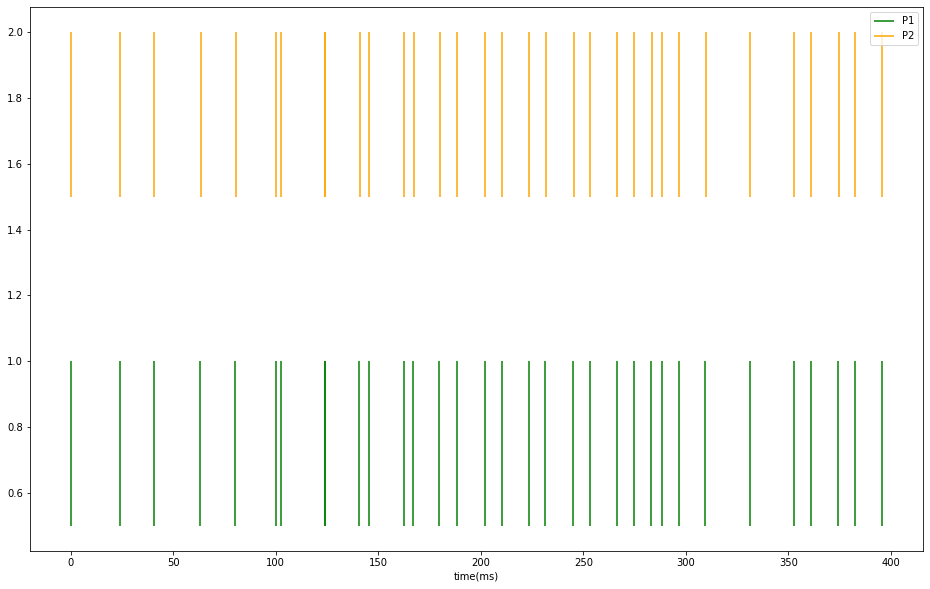

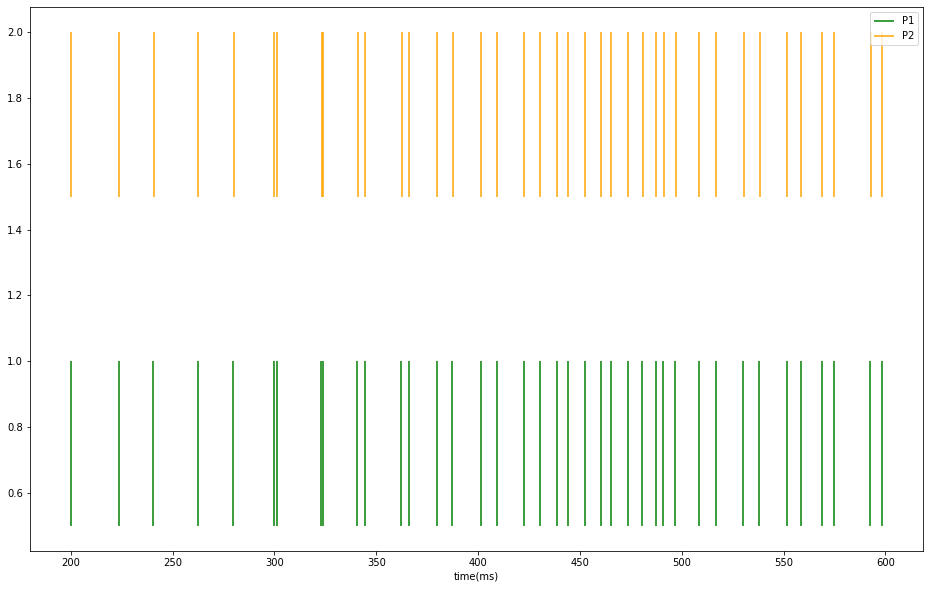

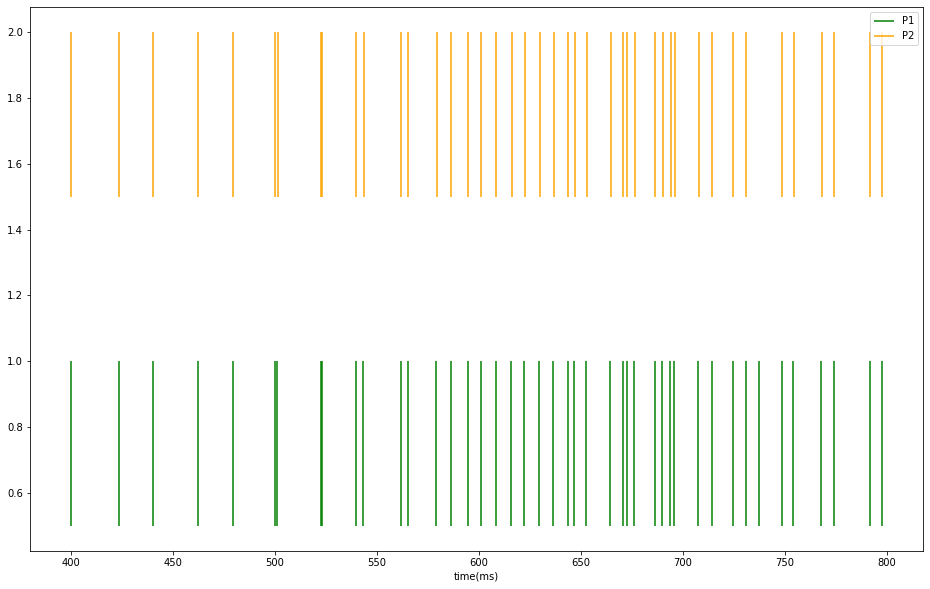

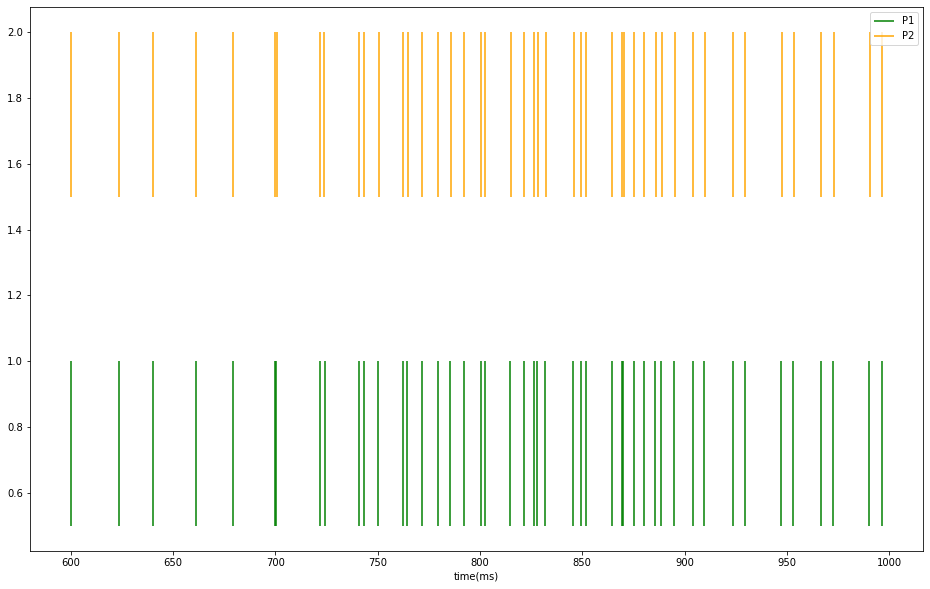

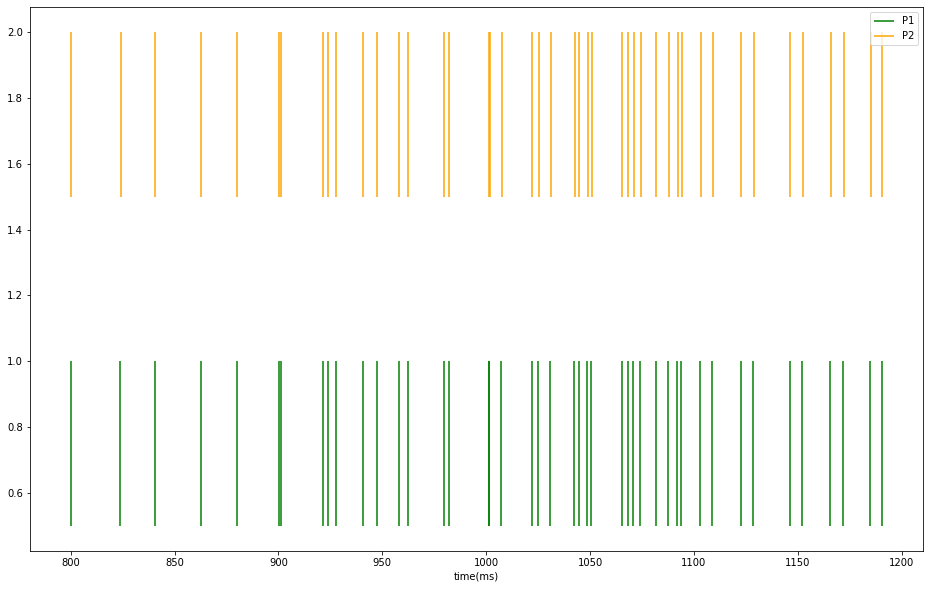

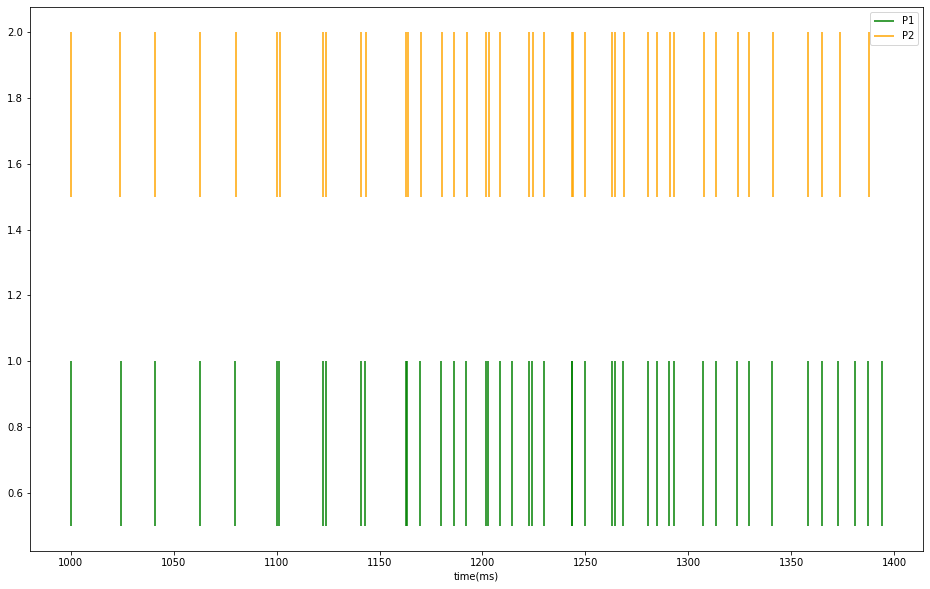

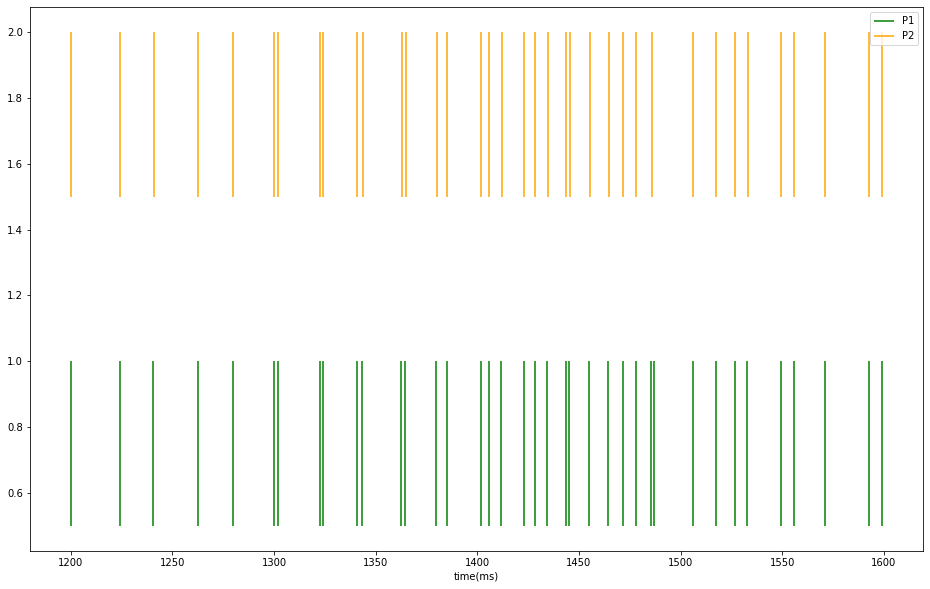

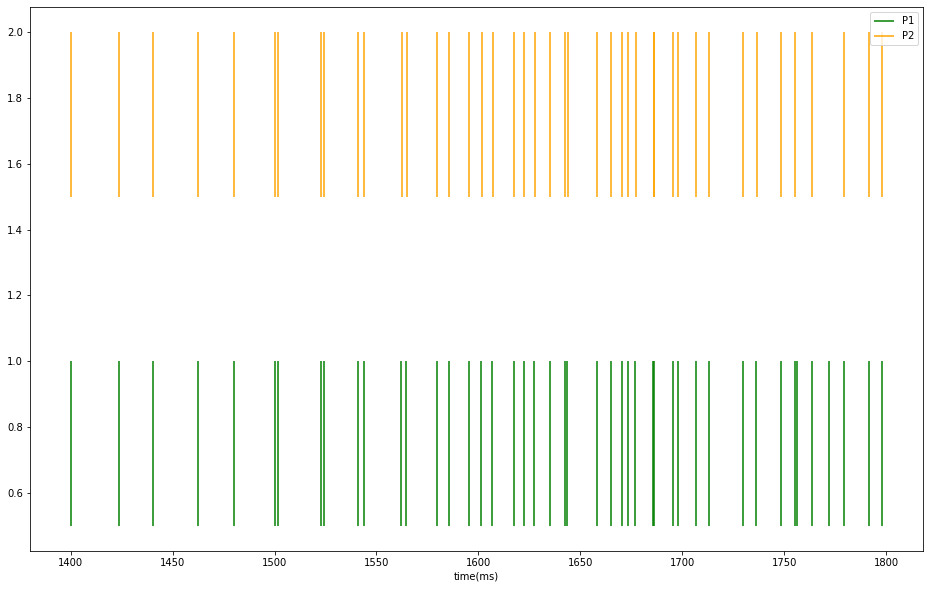

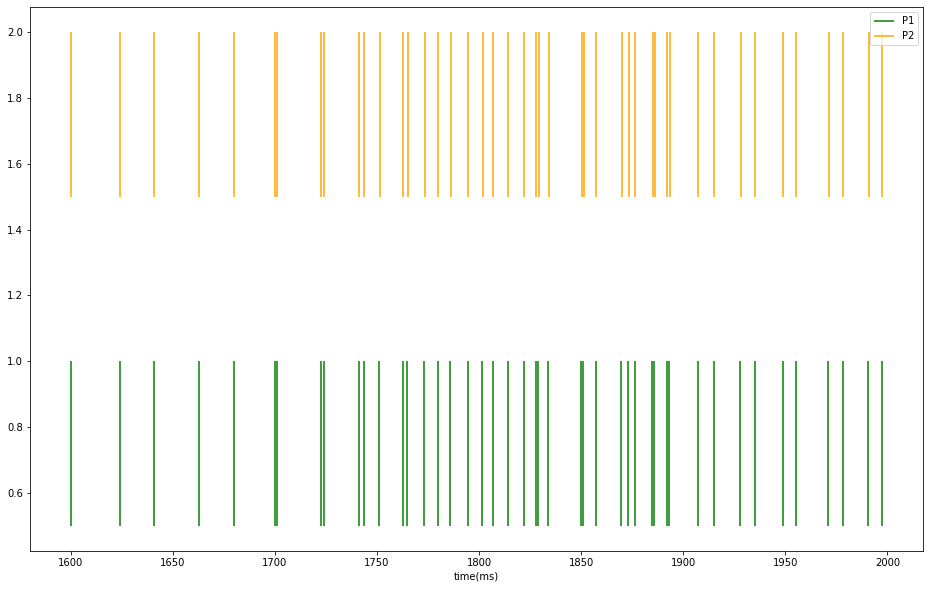

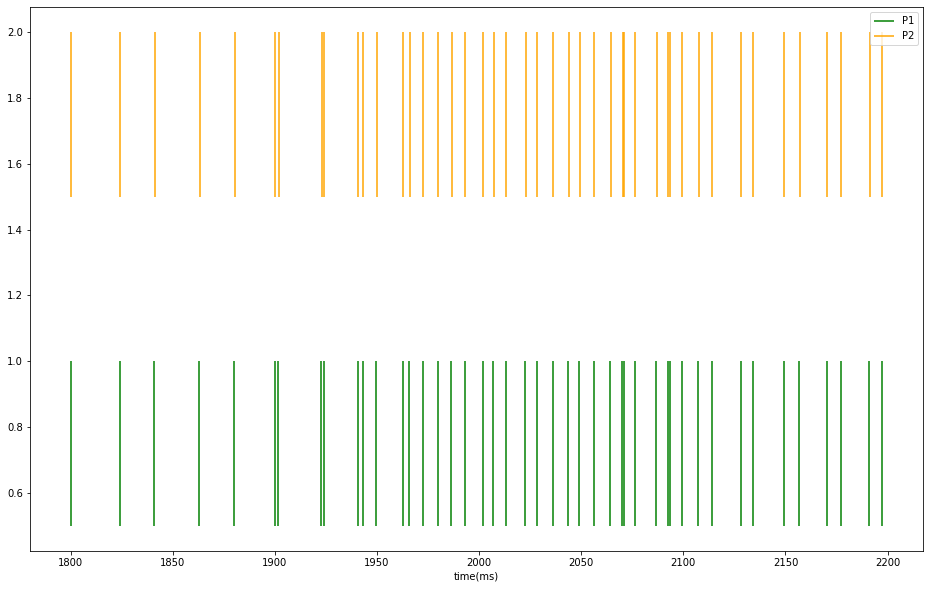

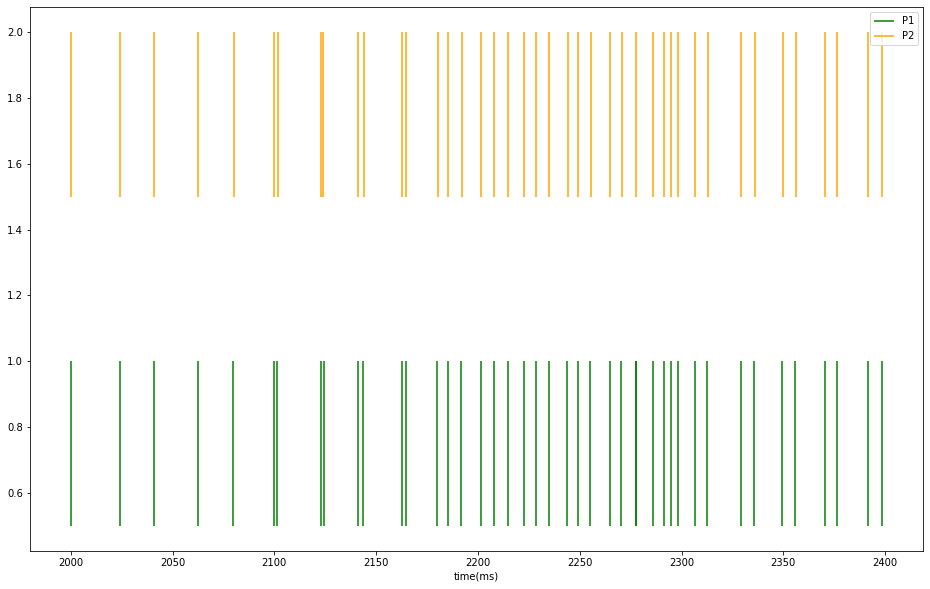

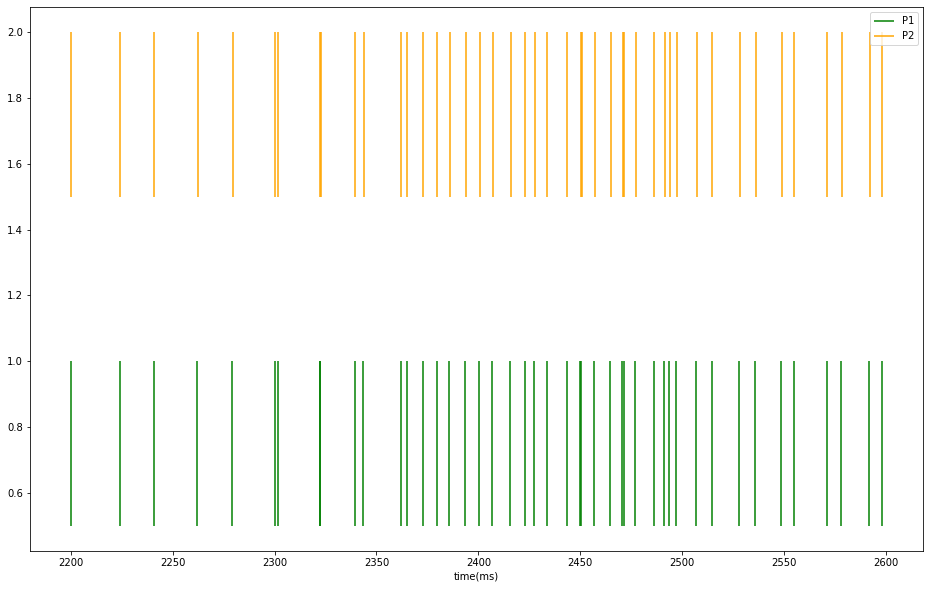

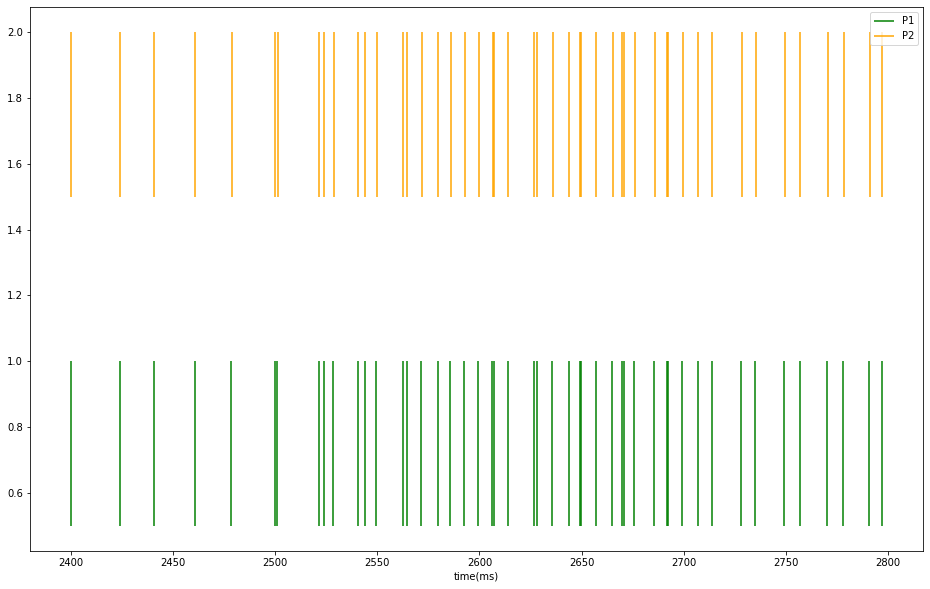

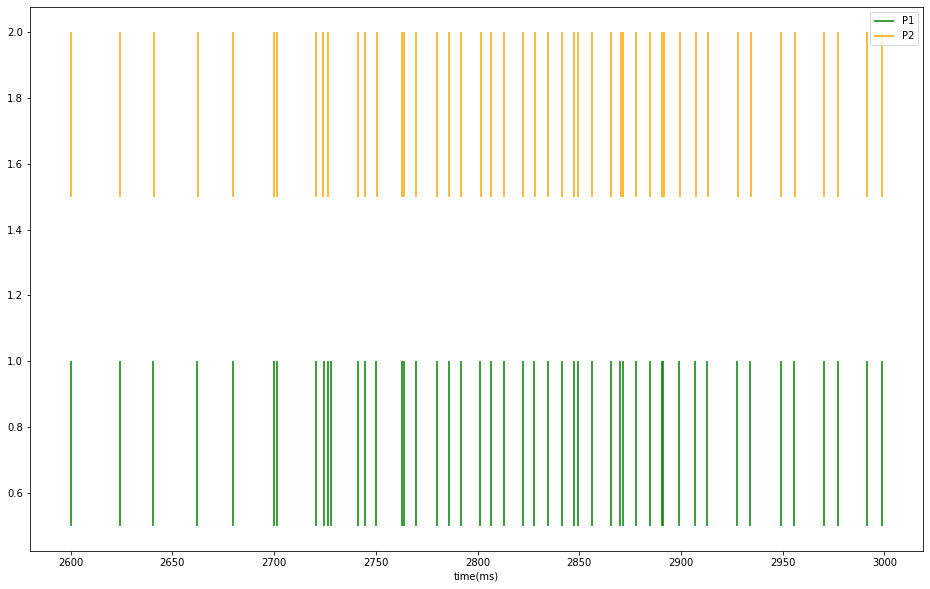

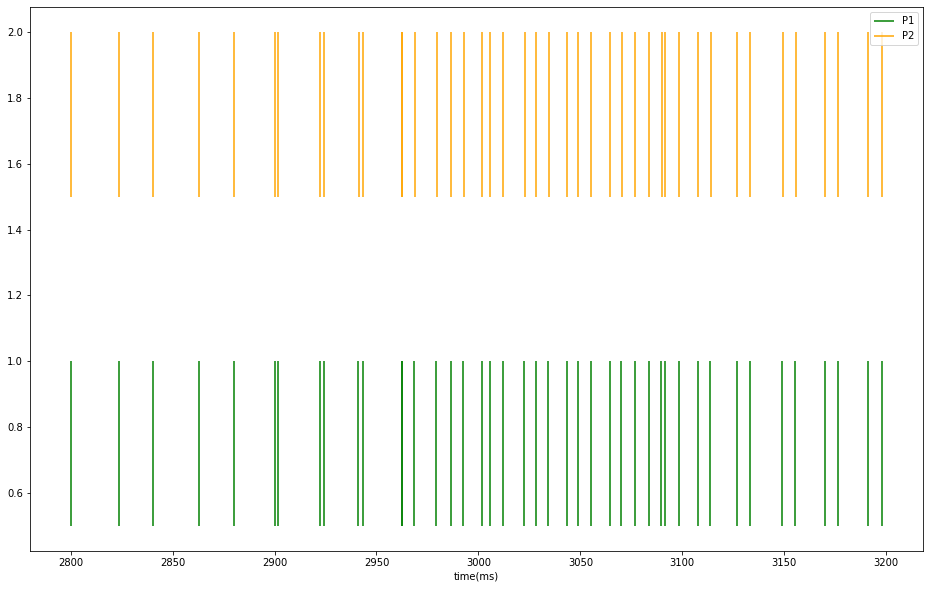

In [ ]:
interval=2 #no.of pairs for each raster scan(if interval is 1 each pair would be displayed individually)
start=0
end=interval
lis=int(size/end)
for k in range(lis):
  color=['green','orange']
  label=['P1','P2']
  plt1.figure(figsize=(16,10))
  for j in range(start,end):
      for i,cell in enumerate(L1.sets[j].cells):
          plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
  plt1.xlabel('time(ms)')
  plt1.legend(label)
  start=end
  end=end+interval


In [ ]:
interval= #no.of pairs for each raster scan(if interval is 1 each pair would be displayed individually)
start=0
end=interval
lis=int(size/end)
for k in range(lis):
  color=['green','orange']
  label=['P1','P2']
  plt1.figure(figsize=(16,10))
  for j in range(start,end):
      for i,cell in enumerate(L1.sets[j].cells):
          plt1.vlines(cell.spike_times+(100*j), i + 0.5, i + 1,color=color[i])
  plt1.xlabel('time(ms)')
  plt1.legend(label)
  start=end
  end=end+interval


In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(16,10))
for j in range(given_input_from_user):
    for i,cell in enumerate(L1.sets[j].cells):
        plt1.vlines(cell.spike_times+(50*j), x + i + 0.5, x + i + 1,color=color[i])
plt1.xlabel('time(ms)')
plt1.legend(label)
t1=list(L1.sets[0].cells[0].spike_times)
t2=list(L1.sets[0].cells[0].spike_times)
print(t1)
print(t2)

TypeError: ignored

<Figure size 1152x720 with 0 Axes>

In [ ]:
color=['green','orange']
label=['P1','P2']
plt1.figure(figsize=(15,8))
for i,cell in enumerate(L1.sets[0].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1.5,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

In [ ]:
%load_ext google.colab.data_table
import pandas
P1_spike_times = list(L1.sets[0].cells[0].spike_times)
P2_spike_times = list(L1.sets[0].cells[1].spike_times)

padding = len(P1_spike_times) - len(P2_spike_times)
P2_spike_times.extend([0 for i in range(padding)]) if padding > 0 else P1_spike_times.extend([0 for i in range(-padding)])
# print(len(P1_spike_times), len(P2_spike_times))
data = {'P1 before learning': P1_spike_times, 'P2 before learning' : P2_spike_times}
pandas.DataFrame(data)